In [1]:
# Import packages/ modules
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import earthpy as et
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime
from textwrap import wrap
from statsmodels.formula.api import ols
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
# Conditional statement to check and set working directory. 
ea_path = os.path.join(et.io.HOME, 'earth-analytics')

if os.path.exists(ea_path):
    os.chdir(ea_path)
    print("working directory is set to earth-analytics") 
else:     
    print("This path does not exist")
    
# Set base path to download data 
base_path = os.path.join(ea_path, "data")
base_path

working directory is set to earth-analytics


'C:\\Users\\bina_\\earth-analytics\\data'

In [3]:
# Files to download for further analysis
# Define relative path to files
file_path1 = os.path.join(base_path,"output_figures","sandiego_2014_fires", "SD_weather_aq2014",                     
                         "SD_O3.csv")
file_path2 = os.path.join(base_path,"output_figures","sandiego_2014_fires", "SD_weather_aq2014",                     
                         "SD_wind.csv")


# file_path2 = os.path.join(base_path,"output_figures","sandiego_2014_fires", "air_quality_csv",                     
#                          "sd_chemical_composition_2014_mean_values_only.csv")

# To check if path is created
os.path.exists(file_path2)

True

In [13]:
# Import csv files into dataframe and ensure date time is imported properly.
sd_counties_O3_df = pd.read_csv(file_path1, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_counties_wind_df = pd.read_csv(file_path2, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_counties_wind_df.head(2)
# sd_counties_wind_df.columns
sd_counties_wind_df.describe()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Pollutant Standard,Observation Count,Observation Percent,Wind (knot),wind_mph,1st Max Value,1st Max Hour,AQI,Method Code
count,5961.0,5961.0,5961.000000,5961.000000,5961.0,5961.000000,5961.000000,0.0,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,0.0,5961.0
mean,6.0,73.0,947.203154,61103.500084,1.0,32.858234,-117.092973,NaN,23.873679,99.480289,100.460877,115.530008,163.559755,12.353800,NaN,20.0
std,0.0,0.0,472.488245,0.500042,0.0,0.214739,0.179110,NaN,0.990888,4.115854,102.509766,117.886231,159.022424,5.690844,NaN,0.0
min,6.0,73.0,1.000000,61103.000000,1.0,32.552164,-117.396158,NaN,1.000000,4.000000,0.400000,0.460000,1.200000,0.000000,NaN,20.0
25%,6.0,73.0,1001.000000,61103.000000,1.0,32.701492,-117.149653,NaN,24.000000,100.000000,3.012500,3.464375,6.400000,9.000000,NaN,20.0
50%,6.0,73.0,1006.000000,61104.000000,1.0,32.842242,-117.075325,NaN,24.000000,100.000000,45.458333,52.277083,103.000000,13.000000,NaN,20.0
75%,6.0,73.0,1010.000000,61104.000000,1.0,32.952124,-116.942092,NaN,24.000000,100.000000,195.541667,224.872917,333.000000,15.000000,NaN,20.0
max,6.0,73.0,2007.000000,61104.000000,1.0,33.217025,-116.768225,NaN,24.000000,100.000000,314.041667,361.147917,360.000000,23.000000,NaN,20.0


In [11]:
#### agg functions is givin wrong values for mph
sd_wind_mean_sem = sd_counties_wind_df.groupby('Date Local').agg({'wind_mph': ['mean','sem']})
sd_wind_mean_sem.to_csv('data/output_figures/sandiego_2014_fires/air_quality_csv/sd_wind_mean_sem_2014.csv')

##########
sd_wind_knots_mean_sem = sd_counties_wind_df.groupby('Date Local').agg({'Wind (knot)': ['mean','sem']})
sd_wind_knots_mean_sem.to_csv('data/output_figures/sandiego_2014_fires/air_quality_csv/sd_wind_knots_mean_sem_2014.csv')

############

sd_wind_mean_mph = pd.DataFrame(sd_counties_wind_df.groupby(['Date Local'
                           ]).mean()["wind_mph"])
sd_wind_mean_mph.to_csv('data/output_figures/sandiego_2014_fires/air_quality_csv/sd_wind_mean_mph.csv')


In [14]:
# sd_counties_O3_df['City Name'].unique()
print("Total measurements at SD County in 2014:", sd_counties_O3_df['City Name'].count())
print("Monitoring stations of San Diego County:",sd_counties_O3_df['City Name'].unique())
print(sd_counties_O3_df['City Name'].value_counts())

#######
city = ['San Diego', 'Del Mar', 'Camp Pendleton South']
sd_coastal= sd_counties_O3_df[sd_counties_O3_df['City Name'].isin(city)]
# sd_coastal.head(2)
# selecting rows based on condition 
# rslt_df = dataframe.loc[(dataframe['Age'] == 21) & 
#               dataframe['Stream'].isin(options)] 
# rslt_df = dataframe[dataframe['Stream'].isin(options)]
# sd_counties_O3_df.columns

Total measurements at SD County in 2014: 3859
Monitoring stations of San Diego County: ['Chula Vista' 'El Cajon' 'Del Mar' 'Escondido' 'Alpine'
 'Camp Pendleton South' 'San Diego' 'Boulevard' 'Pala' 'Otay Mesa']
San Diego               973
Del Mar                 367
Alpine                  365
Camp Pendleton South    365
Chula Vista             365
Boulevard               359
Escondido               358
Pala                    347
El Cajon                240
Otay Mesa               120
Name: City Name, dtype: int64


In [15]:
print(sd_counties_O3_df['Local Site Name'].count())
print(sd_counties_O3_df['Local Site Name'].unique())
# print(sd_counties_O3_df.dtype)
print(sd_counties_O3_df['Local Site Name'].value_counts())



3859
['Chula Vista' 'El Cajon' 'Del Mar' 'Escondido' 'Alpine' 'Camp Pendleton'
 'San Diego - Beardsley Street' 'La Posta Reservation' 'Kearny Villa Rd.'
 'Pala Airpad' 'Otay Mesa' 'El Cajon - Floyd Smith Dr.' 'Donovan']
Del Mar                         367
Camp Pendleton                  365
Alpine                          365
Chula Vista                     365
San Diego - Beardsley Street    364
Kearny Villa Rd.                363
La Posta Reservation            359
Escondido                       358
Pala Airpad                     347
Otay Mesa                       246
El Cajon - Floyd Smith Dr.      182
Donovan                         120
El Cajon                         58
Name: Local Site Name, dtype: int64


In [16]:
sd_counties_O3_df.columns
# sd_counties_O3_df.head()


Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean', 'O3_ppb',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [17]:
sd_stations = sd_counties_O3_df[['City Name', 'O3_ppb']]
sd_stations

# sd_stations.reset_index(inplace = True)
sd_stations

,City Name,O3_ppb
Date Local,,
2014-01-01,Chula Vista,16.529
2014-01-01,El Cajon,18.706
2014-01-01,Del Mar,27.059
2014-01-01,Escondido,15.647
2014-01-01,Alpine,51.118
...,...,...
2014-12-31,Boulevard,14.833
2014-12-31,Otay Mesa,30.333
2014-12-31,San Diego,27.083


In [18]:
sd_coastal= sd_stations[sd_stations['City Name'].isin([
                                    'Del Mar', 
 'Camp Pendleton South', 'San Diego' ])]
sd_coastal

sd_inland= sd_stations[sd_stations['City Name'].isin(['Chula Vista' ,'El Cajon', 
                                                      'Escondido' ,'Alpine',
                                                 'Boulevard' ,'Pala', 'Otay Mesa'
                                    ])]
sd_inland

sd_inland_mean_sem_O3 = sd_inland.groupby('Date Local').agg({'O3_ppb': ['mean','sem']})
sd_inland_mean_sem_O3.to_csv('data/output_figures/sandiego_2014_fires/air_quality_csv/sd_inland_mean_sem_O3.csv')

# sd_inland = pd.DataFrame(sd_PM10.groupby(['Date Local'
#                          ]).mean()["Arithmetic Mean"])
sd_inland_mean_sem_O3.describe()



O3_ppb            
             mean         sem
count  365.000000  365.000000
mean    30.141161    4.599378
std      6.654386    1.313292
min     11.171286    1.337229
25%     24.800000    3.621007
50%     30.506750    4.451075
75%     34.791714    5.413959
max     49.582667    9.084023

In [19]:
sd_coastal_mean_sem_O3 = sd_coastal.groupby('Date Local').agg({'O3_ppb': ['mean','sem']})
sd_coastal_mean_sem_O3.to_csv('data/output_figures/sandiego_2014_fires/air_quality_csv/sd_coastal_mean_sem_O3.csv')
sd_coastal_mean_sem_O3.describe()

O3_ppb            
             mean         sem
count  365.000000  365.000000
mean    31.317654    2.538653
std      7.719745    1.142246
min      9.941250    0.292157
25%     26.223600    1.675279
50%     31.341000    2.503822
75%     36.468400    3.158639
max     55.222000    6.642973

<Figure size 432x288 with 0 Axes>

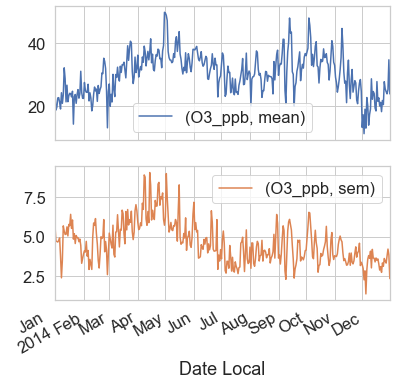

In [20]:
plt.figure()
# plt.legend(loc='best')

sd_inland_mean_sem_O3.plot(subplots=True, figsize=(6, 6));

<Figure size 432x288 with 0 Axes>

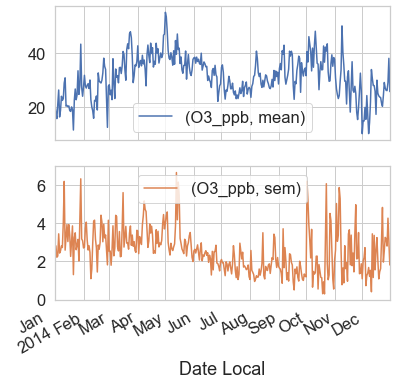

In [21]:
# sd_stations['O3_ppb'].plot()
# sd_stations['AQI'].plot(secondary_y=True, style='g')

# fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(10,10))

# for key, grp in sd_stations2.groupby(['City Name']):
#     ax1 = grp.plot(ax=ax1, kind='line', x='Date Local', y='O3_ppb', label=key)

# for key, grp in sd_stations2.groupby(['City Name']):
#     ax2 = grp.plot(ax=ax2, kind='line', x='Date Local', y='O3_ppb', label=key)
# for key, grp in sd_stations2.groupby(['City Name']):
#     ax3 = grp.plot(ax=ax3, kind='line', x='Date Local', y='O3_ppb', label=key)


# plt.legend(loc='best')

plt.figure()

sd_coastal_mean_sem_O3.plot(subplots=True, figsize=(6, 6));


In [ ]:
sd_coastal_mean_sem_O3.reset_index(inplace=True)

andrews_curves(sd_weather_2014_df_reformat, "variable", colormap = "RdYlBu")

In [23]:
# pd.plotting.scatter_matrix(sd_stations, s=50, figsize = [8,6]);
# plt.show()

In [24]:
# creating filters of bool series from isin()
sd_station2= sd_stations[sd_stations['City Name'].isin(['Chula Vista',
                                   'El Cajon', 'Del Mar', 'Escondido', 'Alpine',
 'Camp Pendleton South', 'San Diego' ])]

sd_stations.head()

# df[df["City Name"].isin["City_1", "City_2]


# sd_counties_O3_df
# sd_counties_O3_df
# filter1 = data["Gender"].isin(["Female"]) 
# filter2 = data["Team"].isin(["Engineering", "Distribution", "Finance" ]) 
  
# # displaying data with both filter applied and mandatory  
# data[filter1 & filter2] 
# (df.loc[df['B'].isin(['one','three'])])


,City Name,O3_ppb
Date Local,,
2014-01-01,Chula Vista,16.529
2014-01-01,El Cajon,18.706
2014-01-01,Del Mar,27.059
2014-01-01,Escondido,15.647
2014-01-01,Alpine,51.118


In [ ]:
# sd_O3_city= sd_counties_O3_df.groupby(['City Name'])["O3_ppb"]
# pd.plotting.scatter_matrix(sd_O3_city, s=50, figsize = [8,6]);
# plt.show()

In [ ]:
# # Express the names as categories
# categories = pd.plotting.Categorical(sd_2014_df)

# # The parameter 'c' is passed to plt.scatter and will control the color
# plotting.scatter_matrix(data, c=categories.codes, marker='o')

# fig = plt.gcf()
# fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13)


In [25]:
# df= sd_weather_2014_df.reset_index(inplace = True)
# df
sd_weather_2014_df.reset_index(inplace = True)
sd_weather_2014_df.head()
# pd.plotting.scatter_matrix(sd_2014_df)

NameError: name 'sd_weather_2014_df' is not defined

In [26]:
pd.plotting.scatter_matrix(sd_weather_2014_df, s=50, figsize = [8,6]);
plt.show()

NameError: name 'sd_weather_2014_df' is not defined

In [ ]:
########  why renaming df does not work???????????
### does not go backward from column to index----
# df= sd_weather_2014_df.reset_index(inplace = True)
# df
# pd.plotting.scatter_matrix(df, s=50, figsize = [8,6]);
# plt.show()

In [ ]:

pd.plotting.scatter_matrix(sd_weather_2014_df, s=30, figsize = [8,6], marker='o', color = 'r');
plt.show()

In [ ]:
# temp and RH have bionmial distrubution 
# check how to separate %50 RH values???
# from matplotlib import cm
# color = {'columns': 'DarkGreen', 'whiskers': 'DarkOrange',
#           'medians': 'DarkBlue', 'caps': 'Gray'}


pd.plotting.scatter_matrix(sd_weather_2014_df, s=50, figsize = [8,6], diagonal='kde', alpha=0.3);
plt.show()

# Autocorrelation plot
Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band. See the Wikipedia entry for more about autocorrelation plots.

In [ ]:
df = sd_weather_2014_df.set_index(['Date Local'])
df

In [ ]:
from pandas.plotting import autocorrelation_plot
import datetime
plt.figure()

autocorrelation_plot(df)

In [ ]:
sd_pivot_table= sd_weather_2014_df.pivot( columns=['T (oF)', 'RH (%)', 'P (mb)', 'wind (mph)', 'Date Local'], 
                                         

sd_pivot_table.head()

In [ ]:
# from pandas.plotting import andrews_curves

# plt.figure()
# Name = (columns = ['T', 'RH', 'P', 'W'])
# andrews_curves(sd_weather_2014_df, "Name" )

In [ ]:
##### ConversionError: Failed to convert timestamps value(s) to axis units
from pandas.plotting import lag_plot
plt.figure()

lag_plot(df)

In [ ]:
# TypeError: unsupported operand type(s) for +: 'Timestamp' and 'float'

# from pandas.plotting import bootstrap_plot
# bootstrap_plot(df, size=50, samples=500, color='green')


In [ ]:
# from sklearn import datasets

# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# df = pd.DataFrame(X, columns = iris.feature_names)

# pd.plotting.scatter_matrix(sd_weather_2014_df)

# colMap={0:"red",1:"blue",2:"yellow"}
# cols=list(map(lambda x:colMap.get(x),iris.target))
# scatter_matrix(df,  diagonal='hist',c=cols)

# How to map colors
# y = sd_weather_2014_df.target
colors=['r', 'g', 'b', 'c']

pd.plotting.scatter_matrix(sd_weather_2014_df, c=colors, figsize = [8,8],
                      s=50, marker = 'D');

# error = 'c' argument has 4 elements, 
# which is not acceptable for use with 'x' with size 365, 'y' with size 365.

# df['y'] = y

# sns.pairplot(df,hue='y')

In [ ]:
sd_2014_df.drop(columns=["Pres_sem"], inplace = True)
sd_2014_df.head()

In [ ]:
# remove index on data  and remove NAN
# pd.plotting.Categorical.scatter_matrix(sd_2014_df)
colors = ["yellow", "red", "green"]
pd.plotting.scatter_matrix(sd_2014_df, c=sd_2014_df.Survived.apply(lambda x:colors[x])
)


plt.show()

In [ ]:
# remove index on data  and remove NAN
# pd.plotting.Categorical.scatter_matrix(sd_2014_df)
colors = ["yellow", "red", "green"]
pd.plotting.scatter_matrix(sd_2014_df, c=sd_2014_df.Survived.apply(lambda x:colors[x])
)


plt.show()